In [1]:
import autogluon

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
train_data = TabularDataset('TrainSet_klassification(7).csv')
train_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,...,native_country_puerto-rico,native_country_scotland,native_country_south,native_country_taiwan,native_country_thailand,native_country_trinadad&tobago,native_country_united-states,native_country_vietnam,native_country_yugoslavia,income
0,51.0,103995.0,12.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,19.0,248339.0,9.0,0.0,0.0,35.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,53.0,290640.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,38.0,149455.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,20.0,241951.0,9.0,0.0,0.0,45.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [4]:
label = 'income'
train_data[label].describe()

count    23199.000000
mean         0.435752
std          0.495866
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: income, dtype: float64

In [5]:
test_data = TabularDataset('TestSet_klassification(8).csv')
test_data.rename(columns={'income_encoded': 'income'}, inplace=True)
test_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,...,native_country_puerto-rico,native_country_scotland,native_country_south,native_country_taiwan,native_country_thailand,native_country_trinadad&tobago,native_country_united-states,native_country_vietnam,native_country_yugoslavia,income
0,49.0,135643.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,45.0,43479.0,10.0,0.0,0.0,48.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,23.0,238831.0,10.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,65.0,172684.0,13.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,48.0,47686.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [6]:
predictor = TabularPredictor(label=label,path="agModels_perdict_income_TEST").fit(train_data, time_limit=14400, presets='best_quality', ag_args_fit={'num_cpus': 16})

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1-NixOS SMP PREEMPT_DYNAMIC Sat Jul 27 09:40:36 UTC 2024
CPU Count:          32
Memory Avail:       57.77 GB / 62.71 GB (92.1%)
Disk Space Avail:   795.67 GB / 1816.45 GB (43.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to dete

(_ray_fit pid=2973714) [1000]	valid_set's binary_error: 0.105508


(_dystack pid=2961386) 	0.8967	 = Validation score   (accuracy)
(_dystack pid=2961386) 	12.52s	 = Training   runtime
(_dystack pid=2961386) 	0.07s	 = Validation runtime
(_dystack pid=2961386) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 2116.61s of the 3316.15s of remaining time.
(_dystack pid=2961386) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=16, gpus=0, memory=0.26%)
(_dystack pid=2961386) 	0.8847	 = Validation score   (accuracy)
(_dystack pid=2961386) 	102.67s	 = Training   runtime
(_dystack pid=2961386) 	0.26s	 = Validation runtime
(_dystack pid=2961386) Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 2012.99s of the 3212.53s of remaining time.
(_dystack pid=2961386) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=16, gpus=0, memory=0.39%)
(_dystack pid=2961386) 	0.8962	 = Validation score   (accuracy)
(_dystack pid=

(_ray_fit pid=2976836) [1000]	valid_set's binary_error: 0.116369
(_ray_fit pid=2976835) [1000]	valid_set's binary_error: 0.107836
(_ray_fit pid=2977467) [1000]	valid_set's binary_error: 0.117967 [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)


(_dystack pid=2961386) 	0.8945	 = Validation score   (accuracy)
(_dystack pid=2961386) 	11.38s	 = Training   runtime
(_dystack pid=2961386) 	0.09s	 = Validation runtime
(_dystack pid=2961386) Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1973.9s of the 3173.43s of remaining time.
(_dystack pid=2961386) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=16, gpus=0, memory=0.14%)
(_dystack pid=2961386) 	0.89	 = Validation score   (accuracy)
(_dystack pid=2961386) 	91.97s	 = Training   runtime
(_dystack pid=2961386) 	0.32s	 = Validation runtime
(_dystack pid=2961386) Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 1880.98s of the 3080.52s of remaining time.
(_dystack pid=2961386) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=16, gpus=0, memory=0.68%)
(_dystack pid=2961386) 	0.8955	 = Validation score   (accuracy)
(_dystack pid=296138

In [7]:
predictor.evaluate(test_data)

{'accuracy': 0.9485714285714286,
 'balanced_accuracy': 0.9091038338143932,
 'mcc': 0.8348283669853447,
 'roc_auc': 0.9753942723478223,
 'f1': 0.8661870503597122,
 'precision': 0.8896551724137931,
 'recall': 0.8439252336448598}

In [8]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr_BAG_L1,0.961290,0.886547,accuracy,0.126725,0.676890,1.379603,0.126725,0.676890,1.379603,1,True,6
1,RandomForestGini_BAG_L1,0.960369,0.886504,accuracy,0.126725,0.648255,1.438622,0.126725,0.648255,1.438622,1,True,5
2,ExtraTrees_r42_BAG_L1,0.959631,0.884866,accuracy,0.124676,0.660255,1.746172,0.124676,0.660255,1.746172,1,True,21
3,ExtraTreesGini_BAG_L1,0.959631,0.885900,accuracy,0.165697,0.697541,0.688673,0.165697,0.697541,0.688673,1,True,8
4,ExtraTreesEntr_BAG_L1,0.958525,0.884909,accuracy,0.176048,0.653522,0.992969,0.176048,0.653522,0.992969,1,True,9
5,LightGBM_BAG_L2,0.949493,0.908186,accuracy,3.067043,25.675779,7298.198199,0.018720,0.055298,268.529595,2,True,25
6,WeightedEnsemble_L3,0.948571,0.908401,accuracy,3.183353,26.311703,7327.773520,0.001233,0.001409,0.730205,3,True,39
7,XGBoost_BAG_L2,0.947650,0.907496,accuracy,3.127654,25.698649,7042.442880,0.079331,0.078168,12.774276,2,True,32
8,LightGBMXT_BAG_L2,0.945806,0.906677,accuracy,3.069109,25.663620,7127.709052,0.020786,0.043139,98.040448,2,True,24
9,LightGBM_r131_BAG_L2,0.945069,0.907151,accuracy,3.080044,25.659998,7230.358609,0.031721,0.039517,200.690005,2,True,37


In [10]:
import pandas as pd

leaderboard_df = predictor.leaderboard(test_data, extra_info=True)

print(leaderboard_df)

                          model  score_test  score_val eval_metric  \
0       RandomForestEntr_BAG_L1    0.961290   0.886547    accuracy   
1       RandomForestGini_BAG_L1    0.960369   0.886504    accuracy   
2         ExtraTrees_r42_BAG_L1    0.959631   0.884866    accuracy   
3         ExtraTreesGini_BAG_L1    0.959631   0.885900    accuracy   
4         ExtraTreesEntr_BAG_L1    0.958525   0.884909    accuracy   
5               LightGBM_BAG_L2    0.949493   0.908186    accuracy   
6           WeightedEnsemble_L3    0.948571   0.908401    accuracy   
7                XGBoost_BAG_L2    0.947650   0.907496    accuracy   
8             LightGBMXT_BAG_L2    0.945806   0.906677    accuracy   
9          LightGBM_r131_BAG_L2    0.945069   0.907151    accuracy   
10         LightGBMLarge_BAG_L2    0.943226   0.907668    accuracy   
11       NeuralNetFastAI_BAG_L2    0.942304   0.903401    accuracy   
12    NeuralNetTorch_r79_BAG_L2    0.936959   0.903530    accuracy   
13         CatBoost_

In [11]:
from IPython.display import FileLink
leaderboard_df.to_csv('autogluon_TEST_leaderboard_classification_preprocessing.csv', index=False)

In [12]:
FileLink('autogluon_TEST_leaderboard_classification_preprocessing.csv')

/home/bogdb/src/pdm-tpot/autogluon_TEST_leaderboard_classification_preprocessing.csv

In [13]:
#predict score
evaluation_results = predictor.evaluate(test_data)

#to df
evaluation_df = pd.DataFrame([evaluation_results])

print(evaluation_df)

#to CSV
evaluation_df.to_csv('autogluon_TEST__classification_predictorScore_preprocessing.csv', index=False)

FileLink('autogluon_TEST_classification_predictorScore_preprocessing.csv')


   accuracy  balanced_accuracy       mcc   roc_auc        f1  precision  \
0  0.948571           0.909104  0.834828  0.975394  0.866187   0.889655   

     recall  
0  0.843925  


/home/bogdb/src/pdm-tpot/autogluon_TEST_classification_predictorScore_preprocessing.csv

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

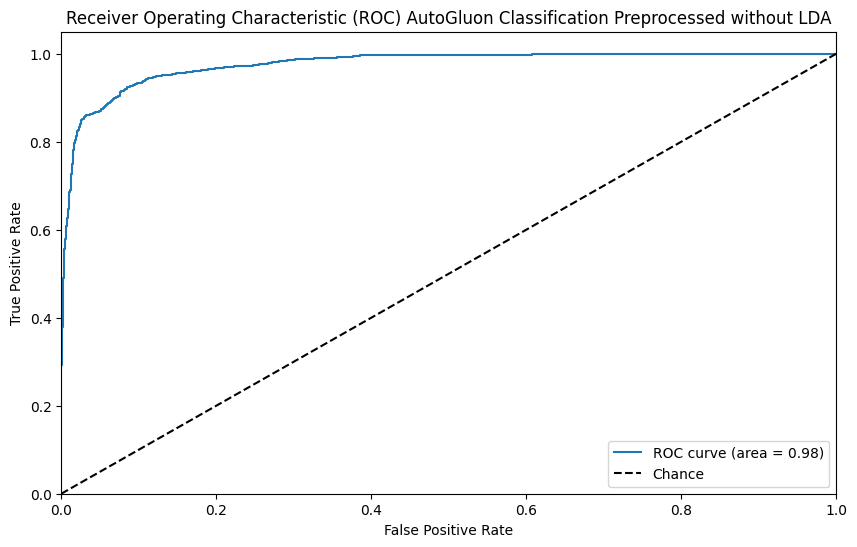

In [16]:
y_true = test_data['income']  
y_scores = predictor.predict_proba(test_data)[1] #positive class

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance') #diagonal line for 'chance'

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) AutoGluon Classification Preprocessed without LDA')
plt.legend(loc="lower right")


plt.savefig('AutoGluon_TEST__classification_preprocessed_roc_curve.png', dpi=300)
plt.show()